# DC Real Estate Data Cleaning (Heavy File)

### 1.1 Import the Libraries

In [1]:
#Imports
import pandas as pd
import re
import numpy as np 
import json
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


### 1.2 Load the .json File

In [2]:
#Load the data into a python dictionary since its a JSON file
with open('/Users/saniaspry/Documents/Flatiron/Phase-4/project/AI-Chatbot-for-Real-Estate/data/washington dc_real estate market_houses for sale_2024.json', 'r') as file:
    heavy_data = json.load(file)

In [3]:
#Convert JSON to a pandas dataframe
heavy_df = pd.DataFrame(heavy_data)

We use json to load the data into Python and convert it into a DataFrame for easier analysis. The head() function shows the first few rows.

In [4]:
#Display first few rows to understand the data structure 
heavy_df.head()

,listingDataSource,zpid,city,state,homeStatus,address,isListingClaimedByCurrentSignedInUser,isCurrentSignedInAgentResponsible,bedrooms,bathrooms,...,specNumber,lotNumber,singleXXLPhoto,summaryFirstPhoto,promotionHeadline,promotionDescription,hasPromotion,moveInCompletionDate,moveInReady,interactiveFloorPlanUrl
0,Phoenix,412096,Washington,DC,FOR_SALE,"{'streetAddress': '1536 1st St NW', 'city': 'W...",False,False,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Phoenix,417127,Washington,DC,FOR_SALE,"{'streetAddress': '605 Acker Pl NE', 'city': '...",False,False,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Phoenix,474804,Washington,DC,FOR_SALE,"{'streetAddress': '824 Otis Pl NW', 'city': 'W...",False,False,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Phoenix,334523428,Washington,DC,FOR_SALE,"{'streetAddress': '88 V St SW APT 807', 'city'...",False,False,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Phoenix,334524066,Washington,DC,FOR_SALE,"{'streetAddress': '1422 Shepherd St NW #1', 'c...",False,False,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Initial Insights

- Location Consistency: The dataset focuses solely on Washington, DC, providing a rich and concentrated dataset ideal for region-specific insights.
- Variety in Home Features: Properties listed include a wide range of bedrooms and bathrooms (e.g., 1 to 5), showcasing diverse housing options that could attract different buyer profiles.
- Active Listings: All entries in the dataset have a home status of "FOR_SALE," indicating it is current and relevant for real estate market analysis.
- Agent and Owner Status: Columns like isListingClaimedByCurrentSignedInUser and isCurrentSignedInAgentResponsible offer unique insights into property claims and responsibilities.
- Data Volume: With 5181 rows and 207 columns, the dataset provides substantial information for robust analyses but requires thoughtful preprocessing and feature selection to extract actionable insights.


## Data Inspection

### 2.1 Understand the Structure

In [5]:
#Check the number of rows and columns
print(f"Dataset contains {heavy_df.shape[0]} rows and {heavy_df.shape[1]} columns.")

Dataset contains 5181 rows and 207 columns.


In [6]:
#Check the column names 
print("Column names:", heavy_df.columns.tolist())

Column names: ['listingDataSource', 'zpid', 'city', 'state', 'homeStatus', 'address', 'isListingClaimedByCurrentSignedInUser', 'isCurrentSignedInAgentResponsible', 'bedrooms', 'bathrooms', 'price', 'yearBuilt', 'streetAddress', 'zipcode', 'isCurrentSignedInUserVerifiedOwner', 'regionString', 'propertyUpdatePageLink', 'moveHomeMapLocationLink', 'propertyEventLogLink', 'editPropertyHistorylink', 'collections', 'listing_sub_type', 'providerListingID', 'isRentalListingOffMarket', 'hdpUrl', 'nearbyCities', 'nearbyNeighborhoods', 'country', 'nearbyZipcodes', 'cityId', 'citySearchUrl', 'zipcodeSearchUrl', 'apartmentsForRentInZipcodeSearchUrl', 'housesForRentInZipcodeSearchUrl', 'abbreviatedAddress', 'county', 'neighborhoodRegion', 'building', 'isUndisclosedAddress', 'boroughId', 'neighborhoodSearchUrl', 'stateSearchUrl', 'countySearchUrl', 'boroughSearchUrl', 'communityUrl', 'isShowcaseListing', 'isPremierBuilder', 'homeType', 'adTargets', 'currency', 'resoFacts', 'monthlyHoaFee', 'attributio

This dataset is well-suited for creating a chatbot due to its size and comprehensive nature. The structured columns can feed into pre-trained NLP models to enable personalized and region-specific responses. However, data cleaning, feature engineering, and integration with external data sources (e.g., financing options, schools) would enhance its effectiveness for conversational AI applications.

### Columns for Different Analytical Purposes
**Necessary columns for Exploratory Data Analysis (EDA):**
 - city, state, zipcode, homeStatus, bedrooms, bathrooms, price, yearBuilt, lotSize, livingArea, daysOnZillow
 - Purpose: To examine distributions, trends, and relationships between property attributes.

**Necessary columns for Inferential Statistics:**
 - price, bedrooms, bathrooms, lotSize, livingArea, yearBuilt, daysOnZillow, monthlyHoaFee
 - Purpose: To identify significant predictors of property price or time on the market.
 
**Necessary columns for Machine Learning:**
 - Features: bedrooms, bathrooms, price, yearBuilt, lotSize, livingArea, daysOnZillow, latitude, longitude, monthlyHoaFee
 - Target: price or daysOnZillow
 - Purpose: Predict property price or market duration using regression or classification models.

**Necessary columns for Deep Machine Learning for Chatbot Development:**
 - Columns: city, state, price, bedrooms, bathrooms, lotSize, livingArea, homeType, homeStatus, streetAddress, zestimate, latitude, longitude, propertyTaxRate
 - Purpose: Train NLP models to answer buyer inquiries, provide price estimates, or recommend properties.
 
We are going to drop the unnecessary columns before cleaning the data. This step reduces the dataset to only relevant information, making the cleaning process more efficient and focused.

Create a list of necessary columns based on their usage for the chatbot, EDA, inferential statistics, and ML:

In [7]:
necessary_columns = [
    'city', 'state', 'zipcode', 'homeStatus', 'bedrooms', 'bathrooms', 
    'price', 'yearBuilt', 'lotSize', 'livingArea', 'daysOnZillow', 
     'monthlyHoaFee', 'latitude', 'longitude', 
    'homeType', 'streetAddress', 'zestimate', 'propertyTaxRate'
]


In [8]:
#Drop all other columns:
heavy_reduced_df = heavy_df[necessary_columns].copy()


In [9]:
#Display the data types of each column
heavy_reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5181 entries, 0 to 5180
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             5181 non-null   object 
 1   state            5181 non-null   object 
 2   zipcode          5181 non-null   object 
 3   homeStatus       5181 non-null   object 
 4   bedrooms         5072 non-null   float64
 5   bathrooms        4978 non-null   float64
 6   price            5181 non-null   int64  
 7   yearBuilt        4999 non-null   float64
 8   lotSize          2613 non-null   float64
 9   livingArea       5084 non-null   float64
 10  daysOnZillow     5181 non-null   int64  
 11  monthlyHoaFee    2387 non-null   float64
 12  latitude         5181 non-null   float64
 13  longitude        5181 non-null   float64
 14  homeType         5181 non-null   object 
 15  streetAddress    5181 non-null   object 
 16  zestimate        3926 non-null   float64
 17  propertyTaxRat

This step helps us see what kind of data we’re dealing with (e.g., numbers, text, dates) and identifies potential issues like missing or incorrectly formatted data.

### 2.2 Check for Missing Values
Missing data is common in real-world datasets. This helps us identify where the gaps are.

In [10]:
#Count missing values in each column
missing_values = heavy_reduced_df.isnull().sum()

In [11]:
#Display only columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
bedrooms          109
bathrooms         203
yearBuilt         182
lotSize          2568
livingArea         97
monthlyHoaFee    2794
zestimate        1255
dtype: int64


beds (109 missing): Number of bedrooms.
- Essential for chatbot recommendations and EDA.
- Missing values might indicate incomplete listings.

baths (203 missing): Number of bathrooms.
- Like beds, critical for recommendations and analysis.

yearBuilt (182 missing): The year the property was built.
- Important for understanding property age, trends, and pricing

lotSize (2568 missing): The size of the property lot.
- Essential for pricing analysis and chatbot recommendations.

livingArea (97 missing): The property's total living area in square feet.
- Directly linked to property value and desirability

monthlyHoaFee (2794 missing): The monthly homeowners association (HOA) fee.
- Impacts the total cost of ownership, critical for buyer decision-making.

zestimate (1255 missing): Zillow's estimated property value.
- A key indicator of property worth, valuable for chatbot insights and pricing analysis.

### 2.3 Check for Duplicates
Duplicates can distort analysis. Removing them ensures data accuracy.



In [12]:
#Convert unhashable columns to strings before checking for duplicates:
heavy_reduced_df = heavy_reduced_df.applymap(lambda x: str(x) if isinstance(x, dict) else x)

/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_3227/250647051.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  heavy_reduced_df = heavy_reduced_df.applymap(lambda x: str(x) if isinstance(x, dict) else x)


In [13]:
#Check for duplicate rows
duplicates = heavy_reduced_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 2


Duplicates can distort analysis. Removing them ensures data accuracy.

In [14]:
#Drop Duplicate Rows
heavy_reduced_df.drop_duplicates()

#Verify Duplicates are removed
print(f"Duplicate rows after dropping: {heavy_reduced_df.duplicated().sum()}")

Duplicate rows after dropping: 2


## Data Cleaning

### 3.1 Handle Missing Values

**beds, baths, yearBuilt, and living area:**

- Replace missing values with the median for now, since median is less affected by extreme values and is better suited for real estate data.
- Add a new column to indicate whether the value was missing (for machine learning).

In [15]:
#Replace missing values with the median
for col in ['bedrooms', 'bathrooms', 'yearBuilt', 'livingArea']:
    median_value = heavy_reduced_df[col].median()
    heavy_reduced_df[col] = heavy_reduced_df[col].fillna(median_value)
    #Create a flag column to indicate missingness
    heavy_reduced_df[f'{col}_missing'] = heavy_reduced_df[col].isnull().astype(int)


- Replacing missing values with the median ensures the dataset remains unbiased for EDA and ML.
- The flag columns (e.g., beds_missing) help ML models understand that these values were originally missing, which can improve predictions.

**lotSize:**

- Replace missing values with the mean as lot sizes can vary significantly and the mean can help capture this spread.

In [16]:
#Replace missing values for lotSize with the mean
heavy_reduced_df['lotSize'].fillna(heavy_reduced_df['lotSize'].mean(), inplace=True)


/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_3227/2513963625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heavy_reduced_df['lotSize'].fillna(heavy_reduced_df['lotSize'].mean(), inplace=True)


**MonthlyHoaFee:**

- Replace missing values with 0 (assume no fee if missing) or the median if HOA fees are common in the dataset.

In [17]:
#Replace missing values for monthlyHoaFee with 0
heavy_reduced_df['monthlyHoaFee'].fillna(0, inplace=True)


/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_3227/3409577260.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heavy_reduced_df['monthlyHoaFee'].fillna(0, inplace=True)


**zestimate:**

Use a predictive model (e.g., linear regression) to fill in missing values based on correlated columns like bedrooms, bathrooms, lotSize, and livingArea.
- Since we're currently in the data cleaning phase, it makes sense to hold off on filling the missing zestimate values until the machine learning section. For now, we can handle the missing zestimate values in a way that won't disrupt our analysis later by using a temporary placeholder

In [18]:

#Keep zestimate missing values as NaN
#No action needed at this stage


In [19]:
#Check for remaining missing values
print("Missing values after cleaning:")
print(heavy_reduced_df.isnull().sum())


Missing values after cleaning:
city                     0
state                    0
zipcode                  0
homeStatus               0
bedrooms                 0
bathrooms                0
price                    0
yearBuilt                0
lotSize                  0
livingArea               0
daysOnZillow             0
monthlyHoaFee            0
latitude                 0
longitude                0
homeType                 0
streetAddress            0
zestimate             1255
propertyTaxRate          0
bedrooms_missing         0
bathrooms_missing        0
yearBuilt_missing        0
livingArea_missing       0
dtype: int64


### 3.2 Format and Standardize Columns
Standardizing the data ensures consistency and usability across all steps of the project. We can convert column names to lowercase and replace spaces (if any) with underscores. However, this does not bother me.



In [20]:
#Standardize column names
# heavy_reduced_df.columns = heavy_reduced_df.columns.str.lower().str.replace(' ', '_')

#Check standardized column names
# print(heavy_reduced_df.columns)


### 3.3 Fix Categorical Data
Identify and prepare categorical data for analysis or modeling.


In [21]:
#Check unique values in categorical columns
categorical_cols = ['city', 'state', 'zipcode', 'homeStatus', 'homeType']
for col in categorical_cols:
    print(f"{col}: {heavy_reduced_df[col].nunique()} unique values")

#Convert necessary columns to categorical data type
heavy_reduced_df[categorical_cols] = heavy_reduced_df[categorical_cols].astype('category')


city: 62 unique values
state: 4 unique values
zipcode: 114 unique values
homeStatus: 1 unique values
homeType: 7 unique values


Making these columns "categories" helps us save memory and prepare for machine learning.

**Handling Unique Values in Categorical Columns**

City, State, and Zipcode:
 - These columns define location and are naturally expected to have a variety of unique values.
 - Use them as they are; consider grouping zip codes into broader regions if necessary for analysis.

HomeStatus:
- With only 1 unique value, this column doesn't add meaningful variation.
- Drop this column unless we expect future data to have more diversity.

Unique Values in statusType and marketingStatusSimplifiedCd
- statusType: Since all values are "FOR_SALE", it doesn't add variability to the dataset. We can drop this column because it doesn't provide additional insights.

HomeType:
  - This column has more variety and might provide useful information about the property.
  -  Encode this column using one-hot encoding or label encoding for machine learning.


In [22]:
#Drop home_status as it has only one unique value
heavy_reduced_df.drop(columns=['homeStatus'], inplace=True)

It provides no useful variation for analysis or modeling.

In [23]:
# Group zipcodes into broader regions (Optional)
# heavy_reduced_df['region'] = heavy_reduced_df['zipcode'].apply(lambda x: 'Region 1' if x.startswith('84') else 'Region 2')


Simplifies analysis by reducing dimensionality.

In [24]:
#Encode home_type for models
#heavy_reduced_df = pd.get_dummies(heavy_reduced_df, columns=['homeType'], drop_first=True)

Machine learning models can’t process text, so we turn it into numbers.

In [25]:
#Display a preview of the cleaned data
heavy_reduced_df.head()

,city,state,zipcode,bedrooms,bathrooms,price,yearBuilt,lotSize,livingArea,daysOnZillow,...,latitude,longitude,homeType,streetAddress,zestimate,propertyTaxRate,bedrooms_missing,bathrooms_missing,yearBuilt_missing,livingArea_missing
0,Washington,DC,20001,3.0,2.0,849500,1907.0,1499.000000,1950.0,0,...,38.91071,-77.01239,TOWNHOUSE,1536 1st St NW,NaN,0.58,0,0,0,0
1,Washington,DC,20002,3.0,3.0,925000,1912.0,1008.000000,1360.0,4,...,38.89662,-76.99799,TOWNHOUSE,605 Acker Pl NE,986100.0,0.58,0,0,0,0
2,Washington,DC,20010,5.0,5.0,1069000,1910.0,1254.000000,2344.0,1,...,38.93392,-77.02516,SINGLE_FAMILY,824 Otis Pl NW,1085300.0,0.58,0,0,0,0
3,Washington,DC,20024,1.0,2.0,860000,2020.0,9278.752392,883.0,0,...,38.86450,-77.01182,CONDO,88 V St SW APT 807,858500.0,0.58,0,0,0,0
4,Washington,DC,20011,2.0,2.0,324900,1920.0,9278.752392,1001.0,553,...,38.93954,-77.03383,TOWNHOUSE,1422 Shepherd St NW #1,NaN,0.58,0,0,0,0


### Explore the Data

### 4.1 Summary Statistics
Inspect numerical data distributions for insights.

In [26]:
#Summary statistics for numerical columns
heavy_reduced_df.describe()

,bedrooms,bathrooms,price,yearBuilt,lotSize,livingArea,daysOnZillow,monthlyHoaFee,latitude,longitude,zestimate,propertyTaxRate,bedrooms_missing,bathrooms_missing,yearBuilt_missing,livingArea_missing
count,5181.000000,5181.000000,5.181000e+03,5181.000000,5181.000000,5181.000000,5181.000000,5181.000000,5181.000000,5181.000000,3.926000e+03,5181.000000,5181.0,5181.0,5181.0,5181.0
mean,3.357653,3.138197,1.245802e+06,1973.185485,9278.752392,2073.093418,64.332947,292.568230,38.914635,-77.069553,1.125978e+06,0.733447,0.0,0.0,0.0,0.0
std,2.084057,1.906859,1.552294e+06,41.626193,16957.970311,2091.693498,105.854093,645.721014,0.056717,0.104781,1.150566e+06,0.226936,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000e+00,1787.000000,0.000000,0.000000,0.000000,0.000000,38.775900,-77.501070,5.920000e+04,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,2.000000,4.389000e+05,1941.000000,4675.000000,840.000000,11.000000,0.000000,38.881080,-77.120450,4.311000e+05,0.580000,0.0,0.0,0.0,0.0
50%,3.000000,3.000000,7.490000e+05,1971.000000,9278.752392,1452.000000,33.000000,0.000000,38.910490,-77.042550,7.266000e+05,0.580000,0.0,0.0,0.0,0.0
75%,5.000000,4.000000,1.590000e+06,2018.000000,9278.752392,2460.000000,71.000000,390.000000,38.944840,-76.999700,1.419775e+06,0.970000,0.0,0.0,0.0,0.0
max,48.000000,14.000000,2.995000e+07,2024.000000,785386.000000,34807.000000,1629.000000,13462.000000,39.093440,-76.865920,1.778460e+07,1.070000,0.0,0.0,0.0,0.0


- Price Range: The house prices range from $0 to $29.95 million, with a median of $749,000. This shows significant variability, likely driven by location and property type.
- Living Area: The living area ranges from 0 to 34,807 square feet, with a median of 1,452 square feet. The large maximum suggests potential outliers.
- Bedrooms and Bathrooms: The majority of houses have 2-5 bedrooms and 2-4 bathrooms, but extreme values (e.g., 48 bedrooms) need investigation for validity.
- Lot Area: The lot area has a mean of 0.016 acres (small lots), but the maximum of 18 acres indicates a mix of residential and estate properties.

### 4.2 Visualize Missing Data
Find patterns in missing data.

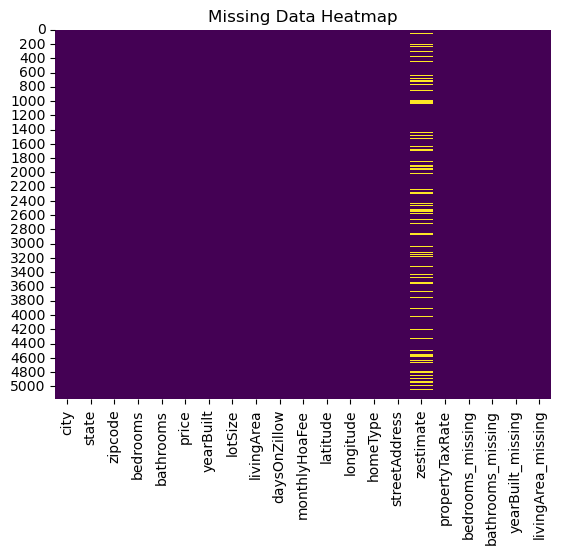

In [27]:
#Visualize missing data
sns.heatmap(heavy_reduced_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

As noted earlier, there are missing values in the zestimate (Zillow's price estimate) column that we will use as our prediction target variable during machine learning.

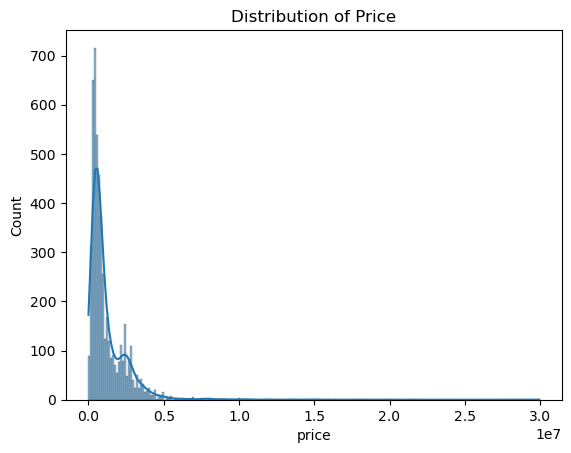

In [28]:
#Histogram for price
sns.histplot(heavy_reduced_df['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

For the price distribution, there is a right-skewed price distribution showcased in the graph suggesting that ...

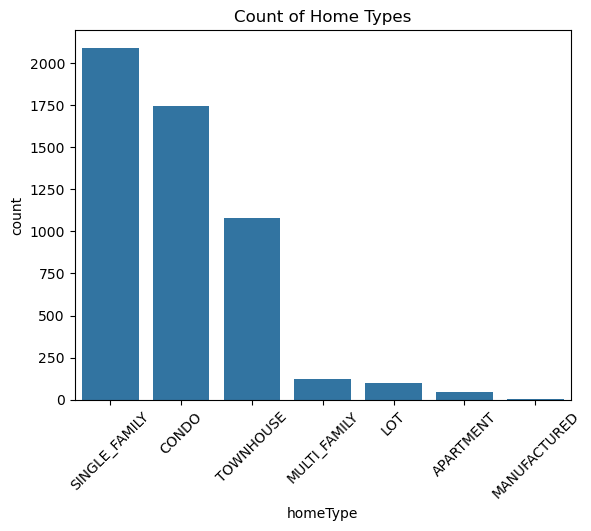

In [29]:
#Bar plot for home type
sns.countplot(data=heavy_reduced_df, x='homeType', order=heavy_reduced_df['homeType'].value_counts().index)
plt.title('Count of Home Types')
plt.xticks(rotation=45)
plt.show()

- Single-Family Homes in the Lead: These are the most common type of homes in the U.S., especially in suburban areas, where families prefer more space and privacy.
- Condos Second in Count: Condos are popular in urban and high-density areas where land is limited and housing costs are higher.
- Manufactured Homes Least Common: Manufactured homes are less common as they are typically located in rural areas and cater to a smaller segment of buyers seeking affordable housing options.

### 4.3 Analyze Relationships
Check trends and correlations.


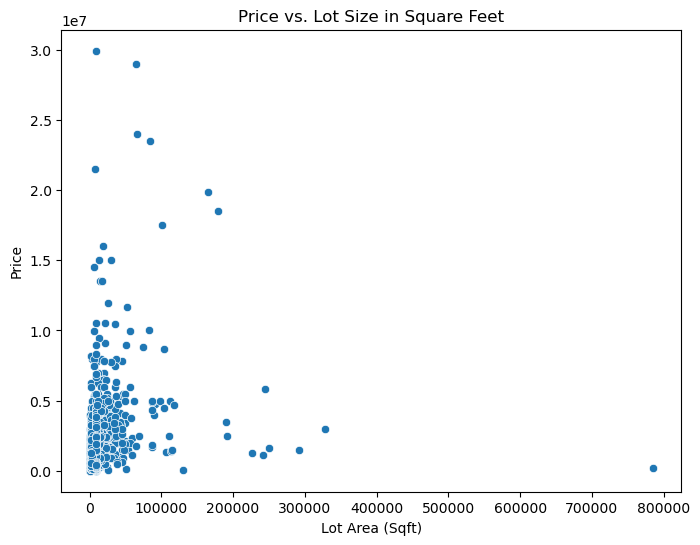

In [30]:
# Scatter plot: Price vs. Lot Area in Acres
plt.figure(figsize=(8, 6))
sns.scatterplot(x='lotSize', y='price', data=heavy_reduced_df)
plt.title("Price vs. Lot Size in Square Feet")
plt.xlabel("Lot Area (Sqft)")
plt.ylabel("Price")
plt.show()


Most properties have a lot area of fewer than 2 acres, and their prices are concentrated below $10 million.
There are a few extreme outliers with very large lot areas (greater than 10 acres) or prices exceeding $20 million.

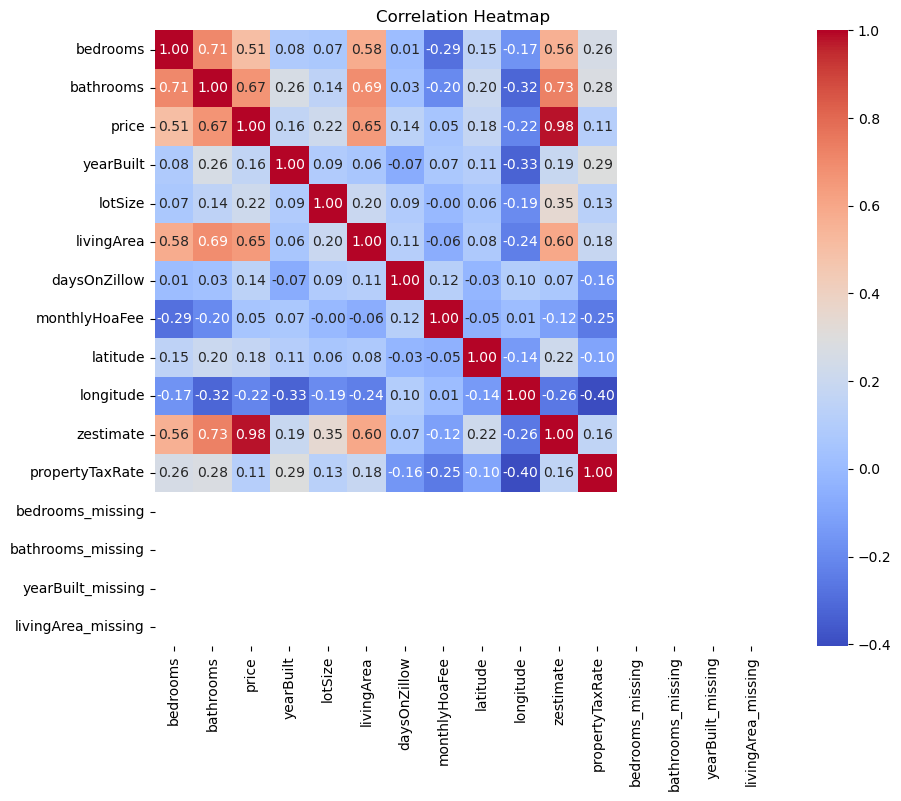

In [31]:
# Select numerical columns
numerical_df = heavy_reduced_df.select_dtypes(include=['float64', 'int64'])

# Generate a correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


- Strong Correlation Between Price and Zestimate (0.98): Zestimate, an estimate of a property's market value, aligns closely with the actual price. This strong correlation indicates Zestimate is a reliable indicator of property pricing trends.
- Correlation Between Bedrooms and Bathrooms (0.71): Homes with more bedrooms tend to have more bathrooms, reflecting design patterns in larger homes to provide convenience for residents.
- Correlation Between Zestimate and Bathrooms (0.73): The number of bathrooms is a contributing factor in estimating home value, suggesting buyers value homes with more bathrooms.

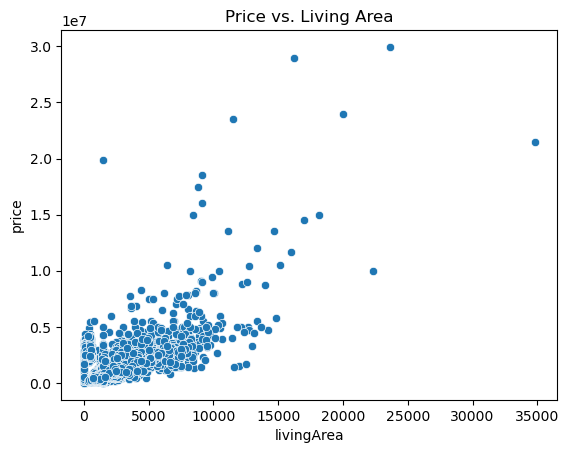

In [32]:
#Scatterplot of price vs. living area
sns.scatterplot(data=heavy_reduced_df, x='livingArea', y='price')
plt.title('Price vs. Living Area')
plt.show()



- Positive Correlation: As the living area increases, home prices generally rise, confirming that larger homes typically cost more.
- Luxury Properties with Large Living Areas: A few properties with massive living areas are priced significantly higher, reflecting the influence of square footage on luxury pricing.
- Clustered Distribution for Smaller Homes: Homes with smaller living areas are tightly clustered in lower price ranges, indicating a higher frequency of moderately-sized, affordable homes.

## Prepare Data for Modeling


### 5.1 Feature Engineering
Create new features for modeling.

In [33]:
#Create a new feature: price per square foot

heavy_reduced_df['price_per_sqft'] = heavy_reduced_df['price'] / heavy_reduced_df['livingArea']


In [35]:

#Print the first few rows to verify the new feature
print(heavy_reduced_df[['price', 'livingArea', 'price_per_sqft']].head(10))



     price  livingArea  price_per_sqft
0   849500      1950.0      435.641026
1   925000      1360.0      680.147059
2  1069000      2344.0      456.058020
3   860000       883.0      973.952435
4   324900      1001.0      324.575425
5   199999       850.0      235.292941
6   423334      1030.0      411.003883
7  1099000      1132.0      970.848057
8   589000      1265.0      465.612648
9   487300      1200.0      406.083333


In [41]:
# # Example: Categorize zip codes into regions (Optional)
# heavy_reduced_df['region'] = heavy_reduced_df['zipcode'].apply(lambda x: 'region_1' if x.startswith('84') else 'region_2')


/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_15302/168494492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['price_range'] = pd.cut(


### 5.2 Handle Outliers
Address extreme values that could distort analysis or models.


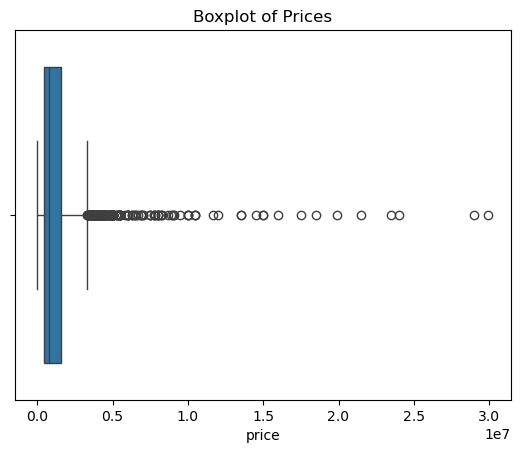

In [36]:
# Visualize outliers using a boxplot
sns.boxplot(x=heavy_reduced_df['price'])
plt.title("Boxplot of Prices")
plt.show()


- Majority of Prices Cluster Below $3.3M: Most homes are within the IQR, indicating typical housing prices remain within an affordable range for the median buyer.
- Significant Outliers Beyond $3.3M: A substantial number of homes are luxury properties priced far above the typical range, influencing the overall market average.
- Skewness Toward Higher Prices: The boxplot shows a right-skewed distribution, with a long tail of higher-priced homes.


In [32]:

#Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = heavy_reduced_df['price'].quantile(0.25)
Q3 = heavy_reduced_df['price'].quantile(0.75)

#Calculate IQR
IQR = Q3 - Q1

#Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter the dataset to remove outliers
heavy_reduced_df = heavy_reduced_df[(heavy_reduced_df['price'] >= lower_bound) & (heavy_reduced_df['price'] <= upper_bound)]

#Print bounds for verification
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")



Lower Bound: -1287750.0, Upper Bound: 3316650.0


Lower Bound: -1,287,750.0 (not realistic since prices cannot be negative).

Upper Bound: 3,316,650.0.
- Prices above this upper bound are considered outliers.
- Suggests the housing market has a significant number of luxury homes priced well beyond the average range.

### 5.3 Normalize Numerical Data
Normalize for improved model performance.

In [44]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical columns
scaler = MinMaxScaler()
numerical_cols = ['price', 'lot_size', 'living_area']
heavy_reduced_df[numerical_cols] = scaler.fit_transform(heavy_reduced_df[numerical_cols])

# Check normalized data
print(heavy_reduced_df[numerical_cols].head())


/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_15302/4210997632.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df[['price', 'area']] = scaler.fit_transform(reduced_df[['price', 'area']])


## Export Clean Data

In [37]:
#Save the cleaned dataset to a file
heavy_reduced_df.to_csv('heavy_cleaned_real_estate_data.csv', index=False)
